# Deep learning from scratch
The goal of the notebook is to demonstrate the usage of the framework implemented with numpy. It includes using the components to solve regression and classification tasks.


In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import make_blobs

In [ ]:
root = '../cifar10' # adjusted dataset root that should be changed accordingly
from dataset import ImageFolderDataset
from dataloader import DataLoader
from layers import (Model,
                    Affine,
                    Relu,
                    Tanh,
                    Sigmoid)
from optimizers import (SGD,
                        SGD_Momentum,
                        Adam)

from transforms import *
from loss_functions import MSE, CrossEntropyFromLogits

## Solving a Simple Regression Task

 Let's now generate a dataset representing sinsuiodal curve and see how different optimizers perform on fitting the curve using our custom model

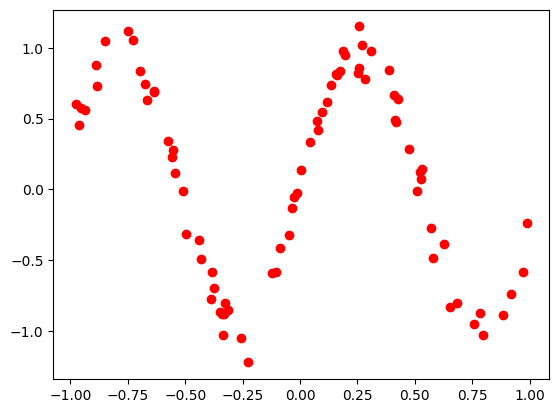

In [110]:
# creating the dataset
x = np.linspace(-1, 1, 1000)
y = np.sin(6 * x) + np.random.normal(0, 0.1, x.shape)
indices = np.arange(len(x))
np.random.shuffle(indices)
split_idx = 80

# Split the data
x_train, x_test = x[indices[:split_idx]], x[indices[split_idx:]]
y_train, y_test = y[indices[:split_idx]], y[indices[split_idx:]]
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
plt.scatter(x_train, y_train, color='red')
plt.show()

We then define the model along with optimizers and loss function.
We compare 3 popular optimizers, that are, SGD, SGD with momentum, and Adam  

In [115]:
# Defining the model and optimizers
my_model_sgd = Model()
my_model_sgd.add_layer(Affine(input_shape=1, number_of_units=32, bias=0))
my_model_sgd.add_layer(Relu())
my_model_sgd.add_layer(Affine(input_shape=32, number_of_units=1, bias=0))

my_model_sgdm = Model()
my_model_sgdm.add_layer(Affine(input_shape=1, number_of_units=32, bias=0))
my_model_sgdm.add_layer(Relu())
my_model_sgdm.add_layer(Affine(input_shape=32, number_of_units=1, bias=0))

layers = [Affine(input_shape=1,number_of_units=32, bias=0),
          Relu(),
          Affine(input_shape=32, number_of_units=1, bias=0)]
# We can also initialize model by giving list of layers as an input
my_model_adam = Model(layers=layers)


# Defining loss function and optimizers
loss_func = MSE()
optim_sgd = SGD(my_model_sgd, loss_func=loss_func, learning_rate=0.1)
optim_sgdm = SGD_Momentum(my_model_sgdm, loss_func=loss_func, learning_rate=0.1)
optim_adam = Adam(my_model_adam, loss_func=loss_func, learning_rate=0.1)


# Initialize lists to store losses
losses_sgd = []
losses_sgdm = []
losses_adam = []

# Training loop
for i in range(1001):
    # SGD
    y_pred_sgd = my_model_sgd(x_train)
    loss_sgd = loss_func.forward(y_pred_sgd, y_train)
    optim_sgd.backward(y_pred_sgd, y_train)
    optim_sgd.step()
    
    # SGDMomentum
    y_pred_sgdm = my_model_sgdm(x_train)
    loss_sgdm = loss_func.forward(y_pred_sgdm, y_train)
    optim_sgdm.backward(y_pred_sgdm, y_train)
    optim_sgdm.step()
    
    # Adam
    y_pred_adam = my_model_adam(x_train)
    loss_adam = loss_func.forward(y_pred_adam, y_train)
    optim_adam.backward(y_pred_adam, y_train)
    optim_adam.step()
    
    # Storing losses every 100th epoch
    if i % 50 == 0:
        losses_sgd.append(loss_sgd)
        losses_sgdm.append(loss_sgdm)
        losses_adam.append(loss_adam)
        print(f'iteration: {i}, SGD loss: {loss_sgd}, SGDMomentum loss: {loss_sgdm}, Adam loss: {loss_adam}')

iteration: 0, SGD loss: 0.4979240253737244, SGDMomentum loss: 0.45916565446255186, Adam loss: 0.48528335186313515
iteration: 50, SGD loss: 0.38402535300515944, SGDMomentum loss: 0.09863229645095824, Adam loss: 0.08373165966565334
iteration: 100, SGD loss: 0.3313953058840163, SGDMomentum loss: 0.08692363804417694, Adam loss: 0.071561463824547
iteration: 150, SGD loss: 0.2817932197700112, SGDMomentum loss: 0.08682884036775788, Adam loss: 0.0723971748352364
iteration: 200, SGD loss: 0.22824146419545405, SGDMomentum loss: 0.08680140263346739, Adam loss: 0.04107595837144586
iteration: 250, SGD loss: 0.18086480991136833, SGDMomentum loss: 0.086789133070216, Adam loss: 0.0404572687052092
iteration: 300, SGD loss: 0.1465678188688146, SGDMomentum loss: 0.08678581346267819, Adam loss: 0.04208871410704965
iteration: 350, SGD loss: 0.1252779845013602, SGDMomentum loss: 0.08678460454530522, Adam loss: 0.026370940737655363
iteration: 400, SGD loss: 0.11291277063642235, SGDMomentum loss: 0.0867842291

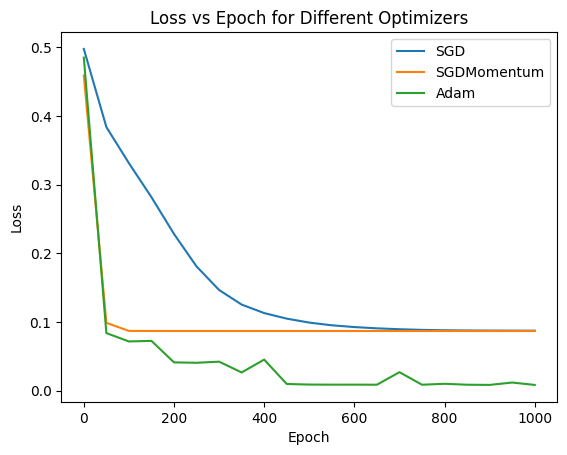

In [117]:
# Plotting the losses
plt.plot(range(0, 1001, 50), losses_sgd, label='SGD')
plt.plot(range(0, 1001, 50), losses_sgdm, label='SGDMomentum')
plt.plot(range(0, 1001, 50), losses_adam, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch for Different Optimizers')
plt.legend()
plt.show()

As we can see in Adam has the fastest convergence rate while SGD and SGD with Momentum converge to local minima

Let's also see what models have learned to predict

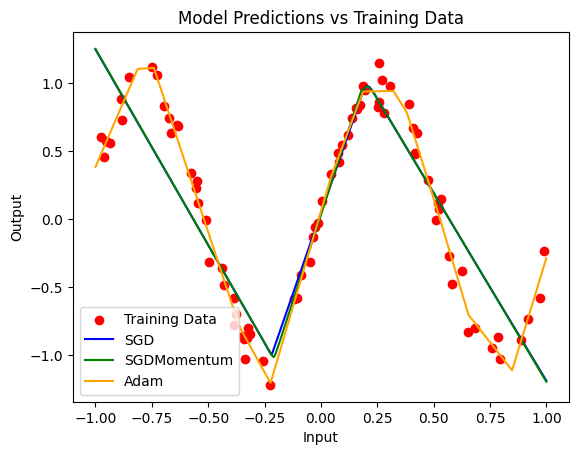

In [114]:
# Visualizing the results of each model
test_x = np.linspace(-1, 1, 1000)


# Predictions
y_pred_sgd = my_model_sgd(test_x)
y_pred_sgdm = my_model_sgdm(test_x)
y_pred_adam = my_model_adam(test_x)

# Plotting the results
plt.scatter(x_train, y_train, color='red', label='Training Data')
plt.plot(test_x, y_pred_sgd, color='blue', label='SGD')
plt.plot(test_x, y_pred_sgdm, color='green', label='SGDMomentum')
plt.plot(test_x, y_pred_adam, color='orange', label='Adam')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Model Predictions vs Training Data')
plt.legend()
plt.show()

## Solving a Simple Classification task

Now let's look how the optimizers perform on a classfication task again using the same model and CrossEntropyFromLogits loss function

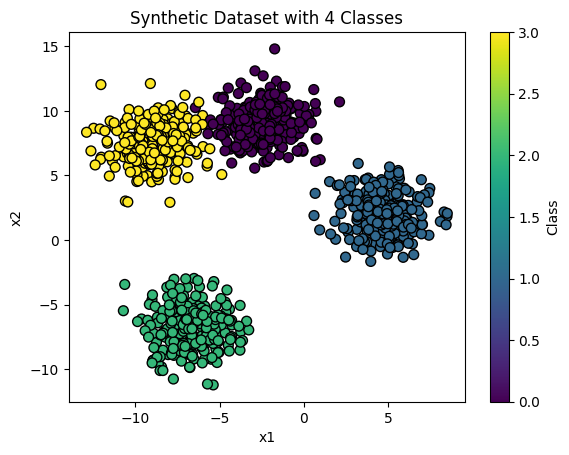

In [147]:
# creating the datasets using sklearn's datasets
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42, cluster_std=1.5)

# visalizing the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Synthetic Dataset with 4 Classes")
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar(label="Class")
plt.show()

In [142]:
# defining shapes of layers
input_shape = 2
hidden_units = 10
output_units = 4

# defining models
model_sgd = Model()
model_sgd.add_layer(Affine(input_shape, hidden_units))
model_sgd.add_layer(Tanh())
model_sgd.add_layer(Affine(hidden_units, output_units))


model_sgdm = Model()
model_sgdm.add_layer(Affine(input_shape, hidden_units))
model_sgdm.add_layer(Tanh())
model_sgdm.add_layer(Affine(hidden_units, output_units))


model_adam = Model()
model_adam.add_layer(Affine(input_shape, hidden_units))
model_adam.add_layer(Tanh())
model_adam.add_layer(Affine(hidden_units, output_units))


# defining loss function and optimizers
loss_func = CrossEntropyFromLogits()
optim_sgd = SGD(model_sgd, loss_func=loss_func, learning_rate=0.001)
optim_sgdm = SGD_Momentum(model_sgdm, loss_func=loss_func, learning_rate=0.001)
optim_adam = Adam(model_adam, loss_func=loss_func, learning_rate=0.001)

In [143]:
# Training loop
epochs = 1000
losses_sgd = []
losses_sgdm = []
losses_adam = []

for epoch in range(epochs):
    # Forward pass
    y_pred_sgd = model_sgd.forward(X)
    y_pred_sgdm = model_sgdm.forward(X)
    y_pred_adam = model_adam.forward(X)

    # Compute loss
    loss_sgd = loss_func.forward(y_pred_sgd, y)
    loss_sgdm = loss_func.forward(y_pred_sgdm, y)
    loss_adam = loss_func.forward(y_pred_adam, y)

    # Backward pass
    optim_sgd.backward(y_pred_sgd, y)
    optim_sgdm.backward(y_pred_sgdm, y)
    optim_adam.backward(y_pred_adam, y)

    # Update parameters
    optim_sgd.step()
    optim_sgdm.step()
    optim_adam.step()

    # Store losses
    if epoch % 50 == 0:
        losses_sgd.append(loss_sgd)
        losses_sgdm.append(loss_sgdm)
        losses_adam.append(loss_adam)
        print(f"Epoch {epoch}: SGD Loss = {loss_sgd}, SGDM Loss = {loss_sgdm}, Adam Loss = {loss_adam}")

Epoch 0: SGD Loss = 2.3417937374356805, SGDM Loss = 2.2626613606428534, Adam Loss = 2.211670095836552
Epoch 50: SGD Loss = 2.1273896227326694, SGDM Loss = 1.0256309908011572, Adam Loss = 1.5678830743571006
Epoch 100: SGD Loss = 1.9983553423210703, SGDM Loss = 0.5964380084876861, Adam Loss = 1.0669541590654794
Epoch 150: SGD Loss = 1.9091710695614013, SGDM Loss = 0.48425349081729946, Adam Loss = 0.7417953361584342
Epoch 200: SGD Loss = 1.8436029482374392, SGDM Loss = 0.4186366301619912, Adam Loss = 0.5561643928597907
Epoch 250: SGD Loss = 1.7953241823572574, SGDM Loss = 0.39581915169653903, Adam Loss = 0.431149610584235
Epoch 300: SGD Loss = 1.7591366086863656, SGDM Loss = 0.39921569050329275, Adam Loss = 0.34544573034084125
Epoch 350: SGD Loss = 1.7313359425269992, SGDM Loss = 0.41003218370535355, Adam Loss = 0.28654760725910033
Epoch 400: SGD Loss = 1.709368996744323, SGDM Loss = 0.4193917257214337, Adam Loss = 0.2437654792155842
Epoch 450: SGD Loss = 1.691638852335087, SGDM Loss = 0.

Let's look at the loss over the epochs

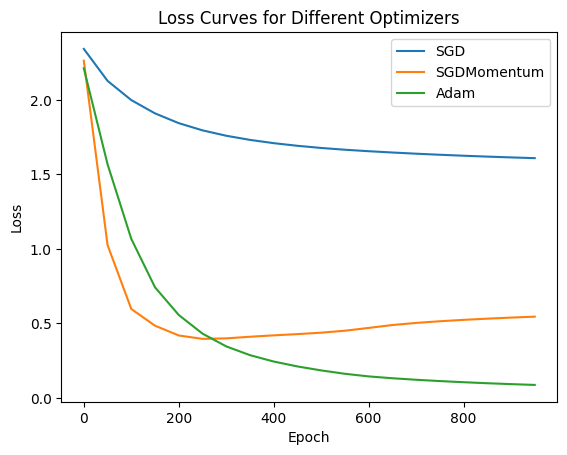

In [144]:
plt.plot(range(0, epochs, 50), losses_sgd, label="SGD")
plt.plot(range(0, epochs, 50), losses_sgdm, label="SGDMomentum")
plt.plot(range(0, epochs, 50), losses_adam, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Optimizers")
plt.legend()
plt.show()

Again Adam outperforms SGD and SGD with momentum

Let's visualise the prediction of the model on a grid 

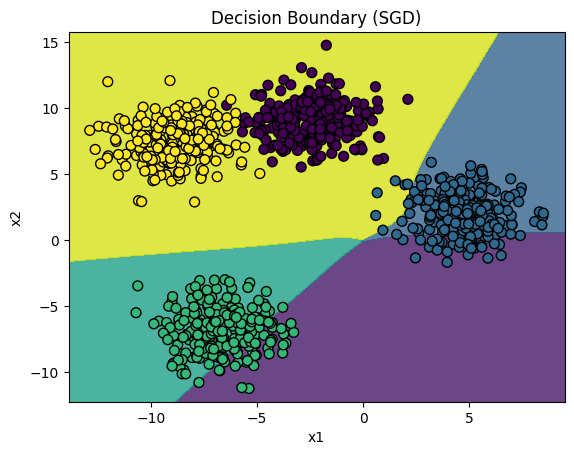

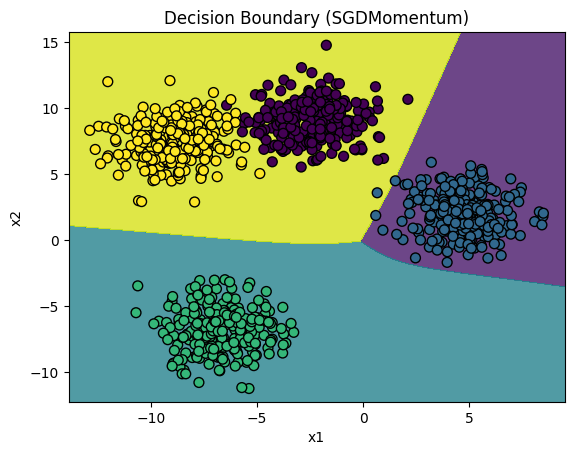

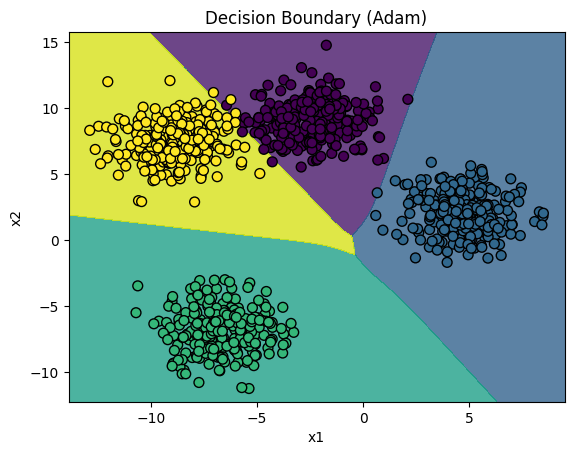

In [148]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# predicting for each optimizer
def predict(model, X):
    logits = model.forward(X)
    return np.argmax(logits, axis=1)

# ploting decision boundaries
def plot_decision_boundary(model, X, y, title):
    Z = predict(model, np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap='viridis')
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# visualizing decision boundaries for each optimizer
plot_decision_boundary(model_sgd, X, y, "Decision Boundary (SGD)")
plot_decision_boundary(model_sgdm, X, y, "Decision Boundary (SGDMomentum)")
plot_decision_boundary(model_adam, X, y, "Decision Boundary (Adam)")

We see that SGD and SGDMomentum have converged to local minimums and were stuck there
while Adam managed to solve the task

## Training model on CIFAR10

We will now demonstrate the usage of the framework by training model on CIFAR10 Dataset.


Let's define our functions for training and evaluating model that folows pytorch's training pipeline

In [183]:
def get_dataset_prediction(model, loader, loss_func=None):
    scores = []
    labels = []

    cumulated_loss = 0
    
    for batch in loader:
        X = batch['data']
        y = batch['labels']
        score = model.forward(X)

        scores.append(score)
        labels.append(y)
        cumulated_loss += loss_func.forward(score, y)
    scores = np.concatenate(scores, axis=0)
    labels = np.concatenate(labels, axis=0)
    preds = scores.argmax(axis=1)
    acc = (labels == preds).mean()
    avg_loss = cumulated_loss / len(loader)

    return avg_loss, acc


def train(model, optimizer, loss_func, epochs, train_loader, val_loader):

    for epoch in range(epochs):

        total_loss = 0.0      
        training_loop = tqdm(train_loader, desc=f'Training Epoch [{epoch + 1}/{epochs}]')
        for batch_idx, batch in enumerate(training_loop):
            X = batch['data']
            y_true = batch['labels']
            
            y_hat = model(X)  # forward pass
            loss_value = loss_func.forward(y_hat, y_true)  # compute loss
            
            optimizer.backward(y_hat, y_true)  # compute gradients
            optimizer.step()  # update parameters

            total_loss += loss_value  # accumulate loss
            avg_loss = total_loss / (batch_idx + 1)  # compute running average

            training_loop.set_postfix(loss=avg_loss)  # update tqdm bar with loss

        print(f"Epoch {epoch + 1}/{epochs} - Avg Training Loss: {total_loss / len(train_loader):.4f}")

        if val_loader:
            avg_loss, accuracy = get_dataset_prediction(model, val_loader, loss_func=loss_func)
            print(f"Validation Loss: {avg_loss:.4f} | Accuracy: {accuracy:.4f}")

### Overfitting on a small sample

It's a common practice to firstly overfit model on a small batch to understand model's minimal capabilities.
If the model is not even able to overfit on a batch then there is no need to continue further training.

#### Data Preprocessing

For data preprocessing we will use the ImageFolderDataset with necessary transforms and the Dataloadder class which will load data with batches.

In [179]:
classes = [
    'plane', 'car', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck',
]
cifar_mean = np.array([0.49191375, 0.48235852, 0.44673872])
cifar_std  = np.array([0.24706447, 0.24346213, 0.26147554])

# defining rescale, normalize and flatten transforms we will apply on the images when
# retrieving them.
rescale_transform = RescaleTransform() # brings range to [0,1] from [0,256]
normalize_transform = NormalizeTransform(cifar_mean, cifar_std) # normalizes with given mu and sigma
flatten_transform = FlattenTransform() # will reshape 32x32 to 3072

# compose transform combines all the transform together
compose_transform =  ComposeTransform([
    rescale_transform,
    normalize_transform,
    flatten_transform
    ])

The root of our dataset contains subdirectories with cifar10 class names overall containing 50000 images, that is, the training set of CIFAR10.
Because we are retreiving data from one directory, we define split argument for the class to split to randomly split the dataset into specified portions and retrieve the portion of the specified mode. For further understanding Have a look at the ImageFolderDataset class at the  `dataset.py` file 

In [156]:
overfit_data = ImageFolderDataset(root_path=root, mode='train', transform=compose_transform, split={'train': 0.1, 'val': 0.89, 'test': 0.01})

The datalaoder class return dictionaries having keys 'data' and 'labels' that combine the datasamples

In [162]:
overfit_data_loader = DataLoader(overfit_data, batch_size=250)

In [ ]:
sample = next(iter(overfit_data_loader))
sample
print(sample['data'].shape, sample['labels'].shape)

(250, 3072) (250,)


Defining model, optimizer, and the loss the function

In [190]:
my_model = Model()
my_model.add_layer(Affine(input_shape=3072, number_of_units=3072, bias=0))
my_model.add_layer(Relu())
my_model.add_layer(Affine(input_shape=3072, number_of_units=3072, bias=0))
my_model.add_layer(Relu())
my_model.add_layer(Affine(input_shape=3072, number_of_units=1024, bias=0))
my_model.add_layer(Relu())
my_model.add_layer(Affine(input_shape=1024, number_of_units=500, bias=0))
my_model.add_layer(Relu())
my_model.add_layer(Affine(input_shape=500, number_of_units=100, bias=0))
my_model.add_layer(Relu())
my_model.add_layer(Affine(input_shape=100, number_of_units=10, bias=0))
loss_func = CrossEntropyFromLogits()
optim = Adam(my_model, learning_rate=0.001, loss_func=loss_func)

Let's see how models overfits data. We will validate it on the same data.

In [191]:
train(model=my_model, optimizer=optim, epochs=40, loss_func=loss_func, train_loader=overfit_data_loader, val_loader=overfit_data_loader)

Training Epoch [1/40]: 100%|██████████| 20/20 [00:12<00:00,  1.64it/s, loss=2.65]


Epoch 1/40 - Avg Training Loss: 2.6544
Validation Loss: 2.2076 | Accuracy: 0.2082


Training Epoch [2/40]: 100%|██████████| 20/20 [00:09<00:00,  2.11it/s, loss=2.05]


Epoch 2/40 - Avg Training Loss: 2.0491
Validation Loss: 1.8960 | Accuracy: 0.3398


Training Epoch [3/40]: 100%|██████████| 20/20 [00:09<00:00,  2.15it/s, loss=1.84]


Epoch 3/40 - Avg Training Loss: 1.8396
Validation Loss: 1.7332 | Accuracy: 0.3890


Training Epoch [4/40]: 100%|██████████| 20/20 [00:10<00:00,  1.83it/s, loss=1.68]


Epoch 4/40 - Avg Training Loss: 1.6778
Validation Loss: 1.5669 | Accuracy: 0.4450


Training Epoch [5/40]: 100%|██████████| 20/20 [00:10<00:00,  1.85it/s, loss=1.51]


Epoch 5/40 - Avg Training Loss: 1.5145
Validation Loss: 1.3938 | Accuracy: 0.5092


Training Epoch [6/40]: 100%|██████████| 20/20 [00:10<00:00,  1.89it/s, loss=1.34]


Epoch 6/40 - Avg Training Loss: 1.3404
Validation Loss: 1.2430 | Accuracy: 0.5738


Training Epoch [7/40]: 100%|██████████| 20/20 [00:08<00:00,  2.28it/s, loss=1.18]


Epoch 7/40 - Avg Training Loss: 1.1774
Validation Loss: 1.0827 | Accuracy: 0.6330


Training Epoch [8/40]: 100%|██████████| 20/20 [00:08<00:00,  2.28it/s, loss=1.05]


Epoch 8/40 - Avg Training Loss: 1.0540
Validation Loss: 1.0288 | Accuracy: 0.6490


Training Epoch [9/40]: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s, loss=1.11]


Epoch 9/40 - Avg Training Loss: 1.1077
Validation Loss: 1.0564 | Accuracy: 0.6472


Training Epoch [10/40]: 100%|██████████| 20/20 [00:09<00:00,  2.11it/s, loss=0.99] 


Epoch 10/40 - Avg Training Loss: 0.9903
Validation Loss: 0.9079 | Accuracy: 0.7012


Training Epoch [11/40]: 100%|██████████| 20/20 [00:09<00:00,  2.02it/s, loss=0.805]


Epoch 11/40 - Avg Training Loss: 0.8046
Validation Loss: 0.7629 | Accuracy: 0.7502


Training Epoch [12/40]: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s, loss=0.782]


Epoch 12/40 - Avg Training Loss: 0.7818
Validation Loss: 0.8189 | Accuracy: 0.7278


Training Epoch [13/40]: 100%|██████████| 20/20 [00:08<00:00,  2.33it/s, loss=0.747]


Epoch 13/40 - Avg Training Loss: 0.7467
Validation Loss: 0.6703 | Accuracy: 0.7844


Training Epoch [14/40]: 100%|██████████| 20/20 [00:08<00:00,  2.34it/s, loss=0.628]


Epoch 14/40 - Avg Training Loss: 0.6284
Validation Loss: 0.5977 | Accuracy: 0.8008


Training Epoch [15/40]: 100%|██████████| 20/20 [00:08<00:00,  2.38it/s, loss=0.531]


Epoch 15/40 - Avg Training Loss: 0.5315
Validation Loss: 0.5175 | Accuracy: 0.8262


Training Epoch [16/40]: 100%|██████████| 20/20 [00:08<00:00,  2.36it/s, loss=0.47] 


Epoch 16/40 - Avg Training Loss: 0.4696
Validation Loss: 0.5181 | Accuracy: 0.8232


Training Epoch [17/40]: 100%|██████████| 20/20 [00:08<00:00,  2.32it/s, loss=0.48] 


Epoch 17/40 - Avg Training Loss: 0.4797
Validation Loss: 0.5588 | Accuracy: 0.8216


Training Epoch [18/40]: 100%|██████████| 20/20 [00:08<00:00,  2.33it/s, loss=0.417]


Epoch 18/40 - Avg Training Loss: 0.4167
Validation Loss: 0.6701 | Accuracy: 0.7914


Training Epoch [19/40]: 100%|██████████| 20/20 [00:08<00:00,  2.25it/s, loss=0.518]


Epoch 19/40 - Avg Training Loss: 0.5179
Validation Loss: 0.4293 | Accuracy: 0.8620


Training Epoch [20/40]: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s, loss=0.408]


Epoch 20/40 - Avg Training Loss: 0.4081
Validation Loss: 0.3803 | Accuracy: 0.8700


Training Epoch [21/40]: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s, loss=0.358]


Epoch 21/40 - Avg Training Loss: 0.3582
Validation Loss: 0.4856 | Accuracy: 0.8394


Training Epoch [22/40]: 100%|██████████| 20/20 [00:09<00:00,  2.15it/s, loss=0.381]


Epoch 22/40 - Avg Training Loss: 0.3814
Validation Loss: 0.4449 | Accuracy: 0.8568


Training Epoch [23/40]: 100%|██████████| 20/20 [00:09<00:00,  2.15it/s, loss=0.331]


Epoch 23/40 - Avg Training Loss: 0.3305
Validation Loss: 0.4890 | Accuracy: 0.8612


Training Epoch [24/40]: 100%|██████████| 20/20 [00:08<00:00,  2.25it/s, loss=0.275]


Epoch 24/40 - Avg Training Loss: 0.2746
Validation Loss: 0.2194 | Accuracy: 0.9278


Training Epoch [25/40]: 100%|██████████| 20/20 [00:08<00:00,  2.33it/s, loss=0.213]


Epoch 25/40 - Avg Training Loss: 0.2131
Validation Loss: 0.2029 | Accuracy: 0.9338


Training Epoch [26/40]: 100%|██████████| 20/20 [00:08<00:00,  2.31it/s, loss=0.215]


Epoch 26/40 - Avg Training Loss: 0.2150
Validation Loss: 0.1876 | Accuracy: 0.9408


Training Epoch [27/40]: 100%|██████████| 20/20 [00:08<00:00,  2.28it/s, loss=0.214]


Epoch 27/40 - Avg Training Loss: 0.2135
Validation Loss: 0.1779 | Accuracy: 0.9468


Training Epoch [28/40]: 100%|██████████| 20/20 [00:08<00:00,  2.27it/s, loss=0.213]


Epoch 28/40 - Avg Training Loss: 0.2133
Validation Loss: 0.1913 | Accuracy: 0.9378


Training Epoch [29/40]: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s, loss=0.2]  


Epoch 29/40 - Avg Training Loss: 0.2005
Validation Loss: 0.1747 | Accuracy: 0.9456


Training Epoch [30/40]: 100%|██████████| 20/20 [00:08<00:00,  2.32it/s, loss=0.164]


Epoch 30/40 - Avg Training Loss: 0.1644
Validation Loss: 0.1014 | Accuracy: 0.9708


Training Epoch [31/40]: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s, loss=0.126]


Epoch 31/40 - Avg Training Loss: 0.1265
Validation Loss: 0.1030 | Accuracy: 0.9662


Training Epoch [32/40]: 100%|██████████| 20/20 [00:08<00:00,  2.28it/s, loss=0.125]


Epoch 32/40 - Avg Training Loss: 0.1248
Validation Loss: 0.1427 | Accuracy: 0.9546


Training Epoch [33/40]: 100%|██████████| 20/20 [00:08<00:00,  2.22it/s, loss=0.141]


Epoch 33/40 - Avg Training Loss: 0.1408
Validation Loss: 0.1841 | Accuracy: 0.9394


Training Epoch [34/40]: 100%|██████████| 20/20 [00:08<00:00,  2.28it/s, loss=0.145]


Epoch 34/40 - Avg Training Loss: 0.1453
Validation Loss: 0.1463 | Accuracy: 0.9556


Training Epoch [35/40]: 100%|██████████| 20/20 [00:09<00:00,  2.18it/s, loss=0.108]


Epoch 35/40 - Avg Training Loss: 0.1078
Validation Loss: 0.1280 | Accuracy: 0.9552


Training Epoch [36/40]: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s, loss=0.118]


Epoch 36/40 - Avg Training Loss: 0.1181
Validation Loss: 0.1187 | Accuracy: 0.9610


Training Epoch [37/40]: 100%|██████████| 20/20 [00:08<00:00,  2.26it/s, loss=0.114]


Epoch 37/40 - Avg Training Loss: 0.1135
Validation Loss: 0.1676 | Accuracy: 0.9502


Training Epoch [38/40]: 100%|██████████| 20/20 [00:09<00:00,  2.18it/s, loss=0.0953]


Epoch 38/40 - Avg Training Loss: 0.0953
Validation Loss: 0.0842 | Accuracy: 0.9752


Training Epoch [39/40]: 100%|██████████| 20/20 [00:10<00:00,  2.00it/s, loss=0.069] 


Epoch 39/40 - Avg Training Loss: 0.0690
Validation Loss: 0.0324 | Accuracy: 0.9920


Training Epoch [40/40]: 100%|██████████| 20/20 [00:09<00:00,  2.13it/s, loss=0.0372]


Epoch 40/40 - Avg Training Loss: 0.0372
Validation Loss: 0.0425 | Accuracy: 0.9876


As we can see the model is able to overfit on a sample of 5000 images.
Let's now check how well it can trained to perform on a the whole dataset.

### Training on a full dataset

In [ ]:
cifar_train = ImageFolderDataset(root_path=root, mode='train', transform=compose_transform) # default split ratio is split={'train': 0.8, 'val': 0.1, 'test': 0.1}
#cifar_test = ImageFolderDataset(root_path=root, mode='test', transform=compose_transform)
cifar_val = ImageFolderDataset(root_path=root, mode='val', transform=compose_transform)

In [192]:
train_loader = DataLoader(cifar_train, batch_size=64)
val_loader = DataLoader(cifar_val, batch_size=64) 


In [ ]:
# defining same model
my_model = Model()
my_model.add_layer(Affine(input_shape=3072, number_of_units=3072, bias=0))
my_model.add_layer(Relu())
my_model.add_layer(Affine(input_shape=3072, number_of_units=3072, bias=0))
my_model.add_layer(Relu())
my_model.add_layer(Affine(input_shape=3072, number_of_units=1024, bias=0))
my_model.add_layer(Relu())
my_model.add_layer(Affine(input_shape=1024, number_of_units=500, bias=0))
my_model.add_layer(Relu())
my_model.add_layer(Affine(input_shape=500, number_of_units=100, bias=0))
my_model.add_layer(Relu())
my_model.add_layer(Affine(input_shape=100, number_of_units=10, bias=0))
# defining loss function and optimizer
loss_func = CrossEntropyFromLogits()
optim = Adam(my_model, learning_rate=0.001, loss_func=loss_func)

In [194]:
train(model=my_model, optimizer=optim, epochs=10, loss_func=loss_func, train_loader=train_loader, val_loader=val_loader)

Training Epoch [1/10]: 100%|██████████| 469/469 [02:33<00:00,  3.05it/s, loss=1.85]


Epoch 1/10 - Avg Training Loss: 1.8544
Validation Loss: 1.6704 | Accuracy: 0.4090


Training Epoch [2/10]: 100%|██████████| 469/469 [02:22<00:00,  3.30it/s, loss=1.58]


Epoch 2/10 - Avg Training Loss: 1.5822
Validation Loss: 1.5787 | Accuracy: 0.4444


Training Epoch [3/10]: 100%|██████████| 469/469 [02:24<00:00,  3.24it/s, loss=1.45]


Epoch 3/10 - Avg Training Loss: 1.4485
Validation Loss: 1.5335 | Accuracy: 0.4583


Training Epoch [4/10]: 100%|██████████| 469/469 [02:24<00:00,  3.26it/s, loss=1.33]


Epoch 4/10 - Avg Training Loss: 1.3284
Validation Loss: 1.5754 | Accuracy: 0.4605


Training Epoch [5/10]: 100%|██████████| 469/469 [02:29<00:00,  3.13it/s, loss=1.23]


Epoch 5/10 - Avg Training Loss: 1.2253
Validation Loss: 1.5629 | Accuracy: 0.4760


Training Epoch [6/10]: 100%|██████████| 469/469 [02:30<00:00,  3.12it/s, loss=1.13]


Epoch 6/10 - Avg Training Loss: 1.1345
Validation Loss: 1.6270 | Accuracy: 0.4764


Training Epoch [7/10]: 100%|██████████| 469/469 [02:33<00:00,  3.06it/s, loss=1.05]


Epoch 7/10 - Avg Training Loss: 1.0477
Validation Loss: 1.6949 | Accuracy: 0.4684


Training Epoch [8/10]: 100%|██████████| 469/469 [02:35<00:00,  3.02it/s, loss=0.975]


Epoch 8/10 - Avg Training Loss: 0.9749
Validation Loss: 1.7285 | Accuracy: 0.4827


Training Epoch [9/10]: 100%|██████████| 469/469 [02:30<00:00,  3.12it/s, loss=0.895]


Epoch 9/10 - Avg Training Loss: 0.8949
Validation Loss: 1.8176 | Accuracy: 0.4813


Training Epoch [10/10]: 100%|██████████| 469/469 [02:33<00:00,  3.06it/s, loss=0.816]


Epoch 10/10 - Avg Training Loss: 0.8156
Validation Loss: 1.9851 | Accuracy: 0.4730


let's get the accuracy on the test set

In [196]:
cifar_test = ImageFolderDataset(root_path=root, mode='test', transform=compose_transform)
test_loader = DataLoader(cifar_test, batch_size=64)

In [197]:
loss, acc = get_dataset_prediction(my_model, test_loader, CrossEntropyFromLogits())

In [199]:
print(f"Test Loss: {loss:.4f} | Accuracy: {acc:.4f}")

Test Loss: 1.9636 | Accuracy: 0.4702


The low accuracy that we get is expected beacuse we are using feed-forwark neural network to train on images

let's now look at a sample of prediction of the model on test data

In [206]:
classes = ['bird', 'car', 'car', 'deer', 'dog', 'frog', 'horse', 'plane', 'ship', 'truck']

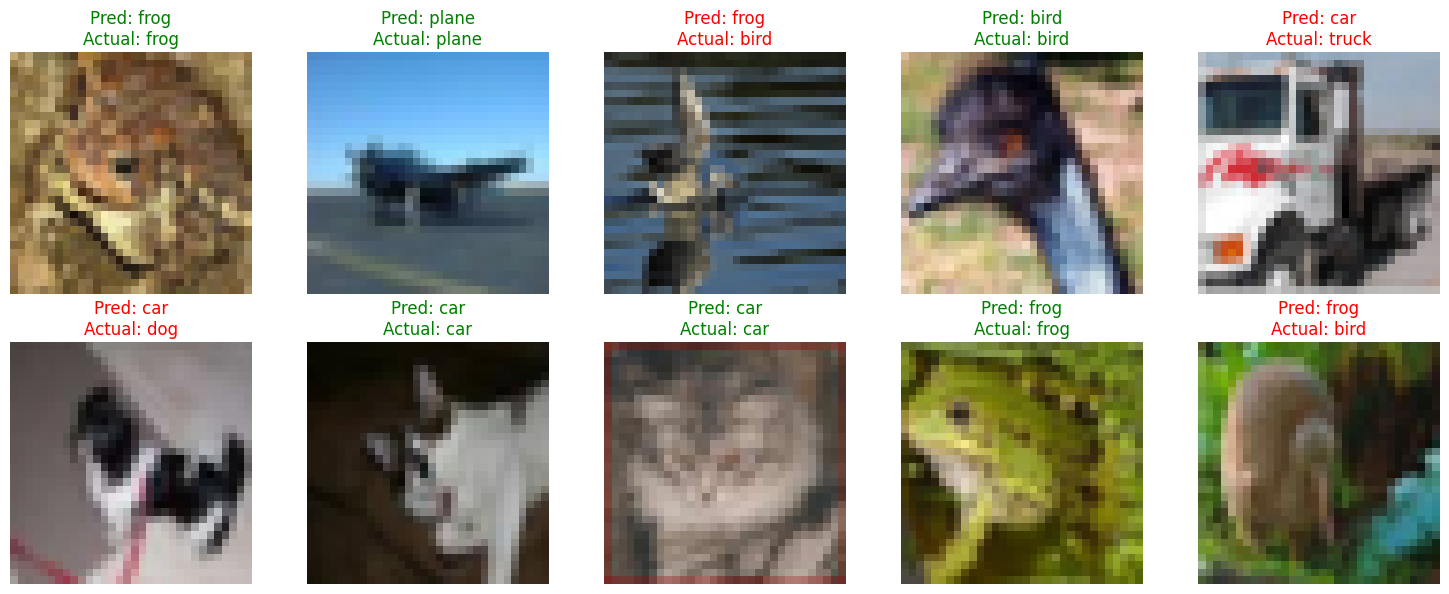

In [209]:


def denormalize(img, mean, std):
    """Reverses the normalization process."""
    return img * std + mean  # Reverse normalization

def visualize_predictions(model, data_loader, classes, mean, std, num_images=10):
    """
    Fetches a batch, gets model predictions, and visualizes the images.
    """
    
    # Get a batch of data
    sample = next(iter(data_loader))
    X_sample, y_true = sample['data'], sample['labels']
    
    # Get model predictions
    y_pred_logits = model(X_sample)  # Forward pass
    y_pred = np.argmax(y_pred_logits, axis=1)  # Convert logits to class index
    
    # Select `num_images` samples to visualize
    X_sample = X_sample[:num_images]
    y_true = y_true[:num_images]
    y_pred = y_pred[:num_images]
    
    # Reshape and de-normalize images
    X_sample = X_sample.reshape(-1, 32, 32, 3)  # Convert from (N, 3072) → (N, 3, 32, 32) → (N, 32, 32, 3)
    X_sample = denormalize(X_sample, mean, std)  # Reverse normalization
    
    # Plot the images with predictions
    fig, axes = plt.subplots(2, num_images // 2, figsize=(15, 6))
    axes = axes.flatten()
    
    for i in range(num_images):
        axes[i].imshow(X_sample[i])
        true_label = classes[y_true[i]]
        pred_label = classes[y_pred[i]]
        axes[i].set_title(f"Pred: {pred_label}\nActual: {true_label}", color=("green" if true_label == pred_label else "red"))
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
visualize_predictions(my_model, test_loader, classes, cifar_mean, cifar_std, num_images=10)
